In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
%matplotlib inline

In [7]:
spotify_data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
data_by_year = pd.read_csv('data/data_by_year.csv')

In [8]:
import plotly.express as px 
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data_by_year, x='year', y=sound_features)
fig.show()

In [9]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [10]:
from sklearn import preprocessing
loudness = spotify_data[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
spotify_data['loudness'] = pd.DataFrame(loudness_scaled)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,0.744797,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,0.707071,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,0.793736,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,0.781521,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,0.881654,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,0.845353,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,0.904769,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,0.827484,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
songs_features=spotify_data[["danceability","loudness","speechiness","acousticness","liveness"]]

In [ ]:
songs_features

,danceability,loudness,speechiness,acousticness,liveness
0,0.279,0.624916,0.0366,0.98200,0.6650
1,0.819,0.744797,0.4150,0.73200,0.1600
2,0.328,0.707071,0.0339,0.96100,0.1010
3,0.275,0.793736,0.0354,0.96700,0.3810
4,0.418,0.781521,0.0380,0.95700,0.2290
...,...,...,...,...,...
170648,0.786,0.881654,0.0881,0.08460,0.0822
170649,0.717,0.845353,0.0605,0.20600,0.1010
170650,0.634,0.904769,0.0809,0.10100,0.2580
170651,0.671,0.827484,0.3080,0.00998,0.6430


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from threadpoolctl import threadpool_limits
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    with threadpool_limits(user_api="openmp", limits=2):
        km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# from sklearn.metrics import silhouette_score
# for n_clusters in range(2,15):
#     clusterer = KMeans (n_clusters=n_clusters)
#     with threadpool_limits(user_api="openmp", limits=2):
#         preds = clusterer.fit_predict(songs_features)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score (songs_features, preds, metric='euclidean')
#     print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

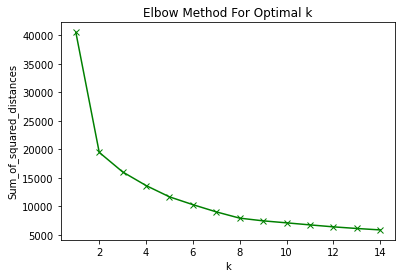

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)


with threadpool_limits(user_api="openmp", limits=2):
    kmeans.fit(songs_features)

In [ ]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



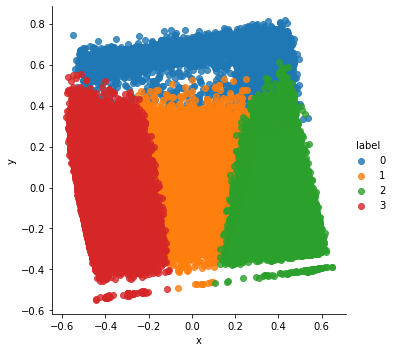

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/home/aayush/git/fitapp_analysis/fitapp_aayush/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



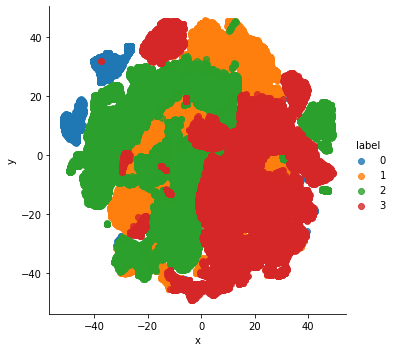

In [ ]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
spotify_data['label'] = y_kmeans

# shuffle dataset

#songs = spotify_data.sample(frac=1)
spotify_data['label'].value_counts()

3    66021
2    63195
1    35977
0     5460
Name: label, dtype: int64

In [ ]:
spotify_data[spotify_data['label'] == 0].tail(50)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,label
163004,0.4190,1982,0.8550,['Eddie Murphy'],0.548,118493,0.257,1,7AFirPJr4Eyk62YqbA5QAR,0.000000,6,0.7100,0.566346,1,Effrom,23,1982,0.930,86.749,0
163061,0.6520,1982,0.6050,"['Carol Hall', 'Dom De Luise', 'Dogettes']",0.725,188467,0.412,0,4uYpZE00Cnvu0Sqe4Vlmpf,0.000000,1,0.0206,0.711189,1,Watchdog Report / Texas Has A Whorehouse In It,21,1982-01-01,0.514,113.633,0
163074,0.6860,1982,0.8990,['Daniel Johnston'],0.540,108027,0.830,0,2Puaza8kJb6ChvV4ynXtUP,0.034900,0,0.3370,0.837930,1,I Had Lost My Mind,25,1982-07-01,0.705,124.477,0
163102,0.2200,1982,0.9340,['Eddie Murphy'],0.506,191533,0.934,1,61kgUlOYDYwGF4ZoYNu6Ur,0.000003,1,0.6510,0.790651,1,Boxers,22,1982,0.945,172.728,0
163152,0.4670,1983,0.9930,['Daniel Johnston'],0.579,282280,0.391,0,2ICmO7SNL85kTurb3o5fd6,0.877000,0,0.1050,0.722496,1,No More Pushing Joe Around,23,1983-09-01,0.650,64.927,0
163168,0.3740,1983,0.7300,['Robin Williams'],0.655,154645,0.218,1,0zD7iOiJNWCjgNg5mj3xSf,0.000000,8,0.3820,0.559283,1,Newsboy,20,1983-01-01,0.926,78.465,0
163227,0.3570,1983,0.9950,['Daniel Johnston'],0.702,52733,0.080,0,7g6dpCXdpkOmc6zIH81YoD,0.012700,11,0.2480,0.637131,0,She Called Pest Control,23,1983-09-01,0.676,80.524,0
163329,0.3360,1984,0.2070,['Black Flag'],0.675,80295,0.301,0,42UuJTbRHox5xCJYRu0lSV,0.000000,11,0.6530,0.536998,1,Family Man,25,1984,0.900,132.716,0
163575,0.0688,1985,0.8390,['Steven Wright'],0.389,148707,0.970,0,2zgFRUW2JdcfGrefSCy0Iy,0.000002,10,0.8700,0.764106,0,Ice,23,1985,0.920,145.489,0
163642,0.1590,1985,0.7300,['Steven Wright'],0.390,290613,0.890,0,4YcSexvDWc8HAKD3IjHTF9,0.000001,0,0.3620,0.776807,1,Rachel,22,1985,0.887,90.765,0


In [ ]:
spotify_data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,label
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,0.760035,0.706902,31.431794,0.098393,116.861590,2.112064
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,0.089233,0.455184,21.826615,0.162740,30.708533,0.844463
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,0.710751,0.000000,11.000000,0.034900,93.421000,2.000000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,0.773941,1.000000,33.000000,0.045000,114.729000,2.000000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,0.827140,1.000000,48.000000,0.075600,135.537000,3.000000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,100.000000,0.970000,243.507000,3.000000


In [ ]:
genre_data.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [ ]:
genre_data

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [ ]:
genre_data["genres"].value_counts()

21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64

In [ ]:
genre_data[genre_data['genres'] == "21st century classical" ].tail(50)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,160297.666667,0.071317,0.606834,0.3616,-31.514333,0.040567,75.3365,0.103783,27.833333,6


In [ ]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,2
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,0.744797,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,0.707071,1,Gati Bali,5,1921,0.0339,110.339,2
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,0.793736,1,Danny Boy,3,1921,0.0354,100.109,2
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,0.781521,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,0.881654,1,China,72,2020-05-29,0.0881,105.029,3
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,0.845353,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,3
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,0.904769,0,AYA,76,2020-11-03,0.0809,91.688,3
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,0.827484,1,Darkness,70,2020-01-17,0.3080,75.055,3


Romantic

In [ ]:
spotify_data[spotify_data['label']==3].mean()

/tmp/ipykernel_1294049/2140549955.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



valence                  0.570499
year                  1994.137138
acousticness             0.089236
danceability             0.578614
duration_ms         244753.405068
energy                   0.706310
explicit                 0.147832
instrumentalness         0.084649
key                      5.281395
liveness                 0.210481
loudness                 0.815352
mode                     0.679087
popularity              44.666394
speechiness              0.084655
tempo                  123.473557
label                    3.000000
dtype: float64

Cheerful

In [ ]:
spotify_data[spotify_data['label']==2].mean()

/tmp/ipykernel_1294049/3844356920.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



valence                  0.439636
year                  1958.366912
acousticness             0.913759
danceability             0.452862
duration_ms         223648.178289
energy                   0.252973
explicit                 0.004162
instrumentalness         0.319877
key                      5.105261
liveness                 0.200125
loudness                 0.700781
mode                     0.724329
popularity              16.539521
speechiness              0.064640
tempo                  109.821090
label                    2.000000
dtype: float64

Energetic

In [ ]:
spotify_data[spotify_data['label']==1].mean()

/tmp/ipykernel_1294049/436876725.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



valence                  0.607499
year                  1982.252856
acousticness             0.533634
danceability             0.589526
duration_ms         226389.371932
energy                   0.507632
explicit                 0.048031
instrumentalness         0.073415
key                      5.179587
liveness                 0.191004
loudness                 0.778826
mode                     0.737360
popularity              37.243572
speechiness              0.063237
tempo                  118.249957
label                    1.000000
dtype: float64

Chill

In [ ]:
spotify_data[spotify_data['label']==0].mean()

/tmp/ipykernel_1294049/787080428.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



valence                  0.531365
year                  1944.182601
acousticness             0.522410
danceability             0.673907
duration_ms         178553.194689
energy                   0.263762
explicit                 0.491209
instrumentalness         0.010290
key                      5.441941
liveness                 0.313585
loudness                 0.653148
mode                     0.640842
popularity               5.473077
speechiness              0.886833
tempo                  109.251038
label                    0.000000
dtype: float64

In [ ]:
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt
from scipy import stats
import random
from recsim import document
from recsim import user
from recsim.choice_model import MultinomialLogitChoiceModel
from recsim.simulator import environment
from recsim.simulator import recsim_gym
from random import randrange

In [ ]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,0.624916,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,2
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,0.744797,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,0.707071,1,Gati Bali,5,1921,0.0339,110.339,2
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,0.793736,1,Danny Boy,3,1921,0.0354,100.109,2
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,0.781521,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,0.881654,1,China,72,2020-05-29,0.0881,105.029,3
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,0.845353,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,3
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,0.904769,0,AYA,76,2020-11-03,0.0809,91.688,3
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,0.827484,1,Darkness,70,2020-01-17,0.3080,75.055,3


In [ ]:
songs=spotify_data[["year", "name", "artists", "popularity", "valence", "id", "danceability","loudness","speechiness","acousticness","liveness", "label"]]

In [ ]:
songs

,year,name,artists,popularity,valence,id,danceability,loudness,speechiness,acousticness,liveness,label
0,1921,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",4,0.0594,4BJqT0PrAfrxzMOxytFOIz,0.279,0.624916,0.0366,0.98200,0.6650,2
1,1921,Clancy Lowered the Boom,['Dennis Day'],5,0.9630,7xPhfUan2yNtyFG0cUWkt8,0.819,0.744797,0.4150,0.73200,0.1600,1
2,1921,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,5,0.0394,1o6I8BglA6ylDMrIELygv1,0.328,0.707071,0.0339,0.96100,0.1010,2
3,1921,Danny Boy,['Frank Parker'],3,0.1650,3ftBPsC5vPBKxYSee08FDH,0.275,0.793736,0.0354,0.96700,0.3810,2
4,1921,When Irish Eyes Are Smiling,['Phil Regan'],2,0.2530,4d6HGyGT8e121BsdKmw9v6,0.418,0.781521,0.0380,0.95700,0.2290,2
...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.6080,0KkIkfsLEJbrcIhYsCL7L5,0.786,0.881654,0.0881,0.08460,0.0822,3
170649,2020,Halloweenie III: Seven Days,['Ashnikko'],68,0.7340,0OStKKAuXlxA0fMH54Qs6E,0.717,0.845353,0.0605,0.20600,0.1010,3
170650,2020,AYA,['MAMAMOO'],76,0.6370,4BZXVFYCb76Q0Klojq4piV,0.634,0.904769,0.0809,0.10100,0.2580,3
170651,2020,Darkness,['Eminem'],70,0.1950,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.827484,0.3080,0.00998,0.6430,3


In [ ]:
songs[songs['popularity'] == 60]

,year,name,artists,popularity,valence,id,danceability,loudness,speechiness,acousticness,liveness,label
3406,1939,"It's Been a Long, Long Time",['Harry James'],60,0.3750,52XDumqYDUXX16R7FM5fpV,0.271,0.786673,0.0310,0.93800,0.2630,2
6207,1953,Claire de lune,"['Claude Debussy', 'Alexis Weissenberg']",60,0.0364,6kf7ZCJjEbjZXikivKOsvJ,0.365,0.543920,0.0519,0.99500,0.0584,2
6409,1954,Over The Rainbow,['Judy Garland'],60,0.3160,3wAIcORchxdSkWv6v5AkaU,0.204,0.701730,0.0336,0.97200,0.1210,2
6812,1956,I Get Along Without You Very Well (Except Some...,['Chet Baker'],60,0.2100,4gFlHAye7To29Fs4UszQUH,0.442,0.578451,0.0410,0.92200,0.1510,2
7024,1957,Autumn In New York,"['Ella Fitzgerald', 'Louis Armstrong']",60,0.1540,0f2489MzoisF9pKduawvce,0.425,0.648156,0.0354,0.95500,0.1370,2
...,...,...,...,...,...,...,...,...,...,...,...,...
170411,2019,WISH FEAT. KIDDO MARV,"['Denzel Curry', 'Kiddo Marv']",60,0.6220,0shSP8DgseLewHgAiMC4UL,0.655,0.833983,0.0736,0.23400,0.4250,3
170418,2019,Gamma Freq Pads,['Masters of Binaurality'],60,0.0283,1yOlQ6v0E3Jgo9iY0dtMyQ,0.205,0.673589,0.0489,0.71300,0.1100,2
170428,2019,Hydrocodone,['Cuco'],60,0.4680,36Uc6BhILjfe4VTgweoHZj,0.761,0.858836,0.0258,0.81300,0.1060,1
170449,2019,Just Like A Movie,['Wallows'],60,0.2230,0Jgbauc8Nv2OOjR5ERW28B,0.449,0.858555,0.0370,0.00121,0.2080,3


In [ ]:
songs.index

RangeIndex(start=0, stop=170653, step=1)

RecSim Document Sampler

In [ ]:
class LTSDocument(document.AbstractDocument):
  def __init__(self, doc_id, genre, songs):
    self.genre = genre
    # doc_id is an integer representing the unique ID of this document
    super(LTSDocument, self).__init__(doc_id)

  def create_observation(self):
    return self.genre
    #return np.array([self.genre])

  @staticmethod
  def observation_space():
    return spaces.Discrete(10)
    #return spaces.Box(shape=(1,), dtype=np.float32, low=0.0, high=1.0)
  
  def __str__(self):
    return "Music {} with genre {}.".format(self._doc_id, self.genre)

In [ ]:
class LTSDocumentSampler(document.AbstractDocumentSampler):
  def __init__(self, doc_ctor=songs, **kwargs):
    super(LTSDocumentSampler, self).__init__(doc_ctor, **kwargs)

  def sample_document(self, songs=songs):
    s=randrange(len(songs.index))
    return songs.loc[[s]]

In [ ]:
s=randrange(len(songs.index))
print(songs.loc[s])

year                              1977
name                    What About It?
artists                ['Eddie Hazel']
popularity                          27
valence                           0.96
id              2znXL2KwdT1fwMecbIZDtp
danceability                     0.638
loudness                      0.761835
speechiness                     0.0612
acousticness                     0.151
liveness                         0.137
label                                3
Name: 147059, dtype: object


In [ ]:
sampler = LTSDocumentSampler()
for i in range(10): print(sampler.sample_document())
d = sampler.sample_document()
print("Sampled songs are:", d)

       year         name       artists  popularity  valence  \
18921  2016  Happy Pills  ['Weathers']          73    0.344   

                           id  danceability  loudness  speechiness  \
18921  3zjjzKg16tczCMwckGKGuH         0.521   0.86236        0.125   

       acousticness  liveness  label  
18921       0.00327     0.324      3  
        year                    name                       artists  \
132362  1978  Shadow of a Lonely Man  ['The Alan Parsons Project']   

        popularity  valence                      id  danceability  loudness  \
132362          36   0.0464  2JLX2xO1gNSz6AaTOuxpO5         0.313  0.702106   

        speechiness  acousticness  liveness  label  
132362       0.0287         0.902     0.111      2  
       year            name          artists  popularity  valence  \
80918  1963  Blue Christmas  ['Johnny Cash']          24    0.572   

                           id  danceability  loudness  speechiness  \
80918  0SmxjwX9kQkMfwh5eSINjr         0

In [ ]:
d

,year,name,artists,popularity,valence,id,danceability,loudness,speechiness,acousticness,liveness,label
53251,2000,Prayin' For Daylight,['Rascal Flatts'],47,0.646,0DAVCurdi9ZqkVUKIuikzm,0.64,0.89022,0.0398,0.578,0.272,1


In [ ]:
from typing import Tuple
from pathlib import Path
DATASET_NAME="Spotify"
_DATA_PATH = Path(Path.home() / os.environ.get("DATA_PATH"))
_DATASET_PATH = _DATA_PATH / DATASET_NAME
songs.to_feather(_DATASET_PATH)